In [124]:
import ast
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datasets import load_dataset

In [125]:
my_dataset=load_dataset('lukebarousse/data_jobs')

In [126]:
df=my_dataset['train'].to_pandas()

In [127]:
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

In [128]:
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



In [129]:
df_DA_US=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()
len(df_DA_US)

67816

In [130]:
df_DA_US=df_DA_US.dropna(subset='salary_year_avg')
skill_count=len(df_DA_US)

In [131]:
df_DA_US_explode=df_DA_US.explode('job_skills')
len(df_DA_US_explode)

17440

In [132]:
df_DA_skills=df_DA_US_explode.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_skills=df_DA_skills.rename(columns={'count':'skill_count', 'median':'median_salary'})

df_DA_skills['skill_percent']=(df_DA_skills['skill_count']/skill_count)*100
skill_per_limit=5
df_DA_skills_lim=df_DA_skills[df_DA_skills['skill_percent']>skill_per_limit]
df_DA_skills_lim

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


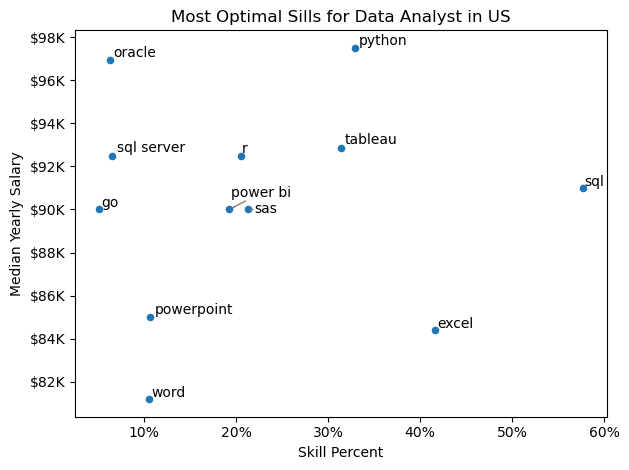

In [133]:
from adjustText import adjust_text
df_DA_skills_lim.plot(kind='scatter', x='skill_percent', y='median_salary')
# Prepare texts for adjust text
texts=[]
from matplotlib.ticker import PercentFormatter
for i, txt in enumerate(df_DA_skills_lim.index):
    texts.append(plt.text(df_DA_skills_lim['skill_percent'].iloc[i], df_DA_skills_lim['median_salary'].iloc[i], txt))
# adjust text to overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))
plt.xlabel('Skill Percent')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Sills for Data Analyst in US')
ax=plt.gca()
ax=ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax=plt.gca()
ax=ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.tight_layout()
plt.show()

## Creating another data frame of df_technology

In [135]:
df_technology=df['job_type_skills'].copy()

## Remove duplicates

In [136]:
df_technology=df_technology.drop_duplicates()

In [154]:
## Drop NA
df_technology=df_technology.dropna()
df_technology

1         {'analyst_tools': ['power bi', 'tableau'], 'pr...
2         {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3         {'cloud': ['aws'], 'libraries': ['tensorflow',...
4         {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
5         {'cloud': ['gcp'], 'programming': ['python', '...
                                ...                        
785697    {'analyst_tools': ['power bi', 'tableau', 'wor...
785721    {'analyst_tools': ['looker', 'tableau', 'splun...
785725    {'cloud': ['bigquery'], 'libraries': ['gdpr'],...
785735    {'cloud': ['bigquery', 'aws'], 'libraries': ['...
785736    {'os': ['linux', 'unix'], 'other': ['kubernete...
Name: job_type_skills, Length: 177562, dtype: object

In [158]:
tech_dict={}
for row in df_technology:
    row_dict=ast.literal_eval(row) # converting str to dict
    for key, value in row_dict.items():
        if key in tech_dict: ## if key already exist in the dict add value to existing dict
            tech_dict[key]+=value
        else:
            tech_dict[key]=value
for key, value in tech_dict.items():
    tech_dict[key]=list(set(value))
tech_dict

{'analyst_tools': ['visio',
  'splunk',
  'excel',
  'dax',
  'ms access',
  'cognos',
  'microstrategy',
  'spss',
  'sharepoint',
  'looker',
  'nuix',
  'power bi',
  'tableau',
  'sap',
  'datarobot',
  'qlik',
  'alteryx',
  'powerbi',
  'powerpoint',
  'msaccess',
  'sas',
  'ssis',
  'ssrs',
  'spreadsheet',
  'esquisse',
  'word',
  'sheets',
  'outlook'],
 'programming': ['ruby',
  'no-sql',
  'fortran',
  'pascal',
  'vb.net',
  'mongo',
  'lua',
  'go',
  'matlab',
  'solidity',
  'dart',
  'lisp',
  't-sql',
  'clojure',
  'kotlin',
  'objective-c',
  'perl',
  'nosql',
  'sass',
  'julia',
  'shell',
  'javascript',
  'f#',
  'r',
  'scala',
  'c',
  'powershell',
  'css',
  'rust',
  'html',
  'crystal',
  'bash',
  'sql',
  'mongodb',
  'c#',
  'sas',
  'visual basic',
  'haskell',
  'php',
  'typescript',
  'visualbasic',
  'assembly',
  'python',
  'elixir',
  'erlang',
  'ocaml',
  'golang',
  'c++',
  'swift',
  'delphi',
  'java',
  'groovy',
  'cobol',
  'vba',
  '

In [160]:
## Converting into dataframe
df_technology=pd.DataFrame(list(tech_dict.items()), columns=['technology', 'skills'])

In [161]:
df_technology=df_technology.explode('skills')

In [162]:
df_technology

,technology,skills
0,analyst_tools,visio
0,analyst_tools,splunk
0,analyst_tools,excel
0,analyst_tools,dax
0,analyst_tools,ms access
...,...,...
9,sync,slack
9,sync,wire
9,sync,rocketchat
9,sync,google chat


In [164]:
df_plot=df_DA_skills_lim.merge(df_technology, left_on='job_skills', right_on='skills')

In [165]:
df_plot

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


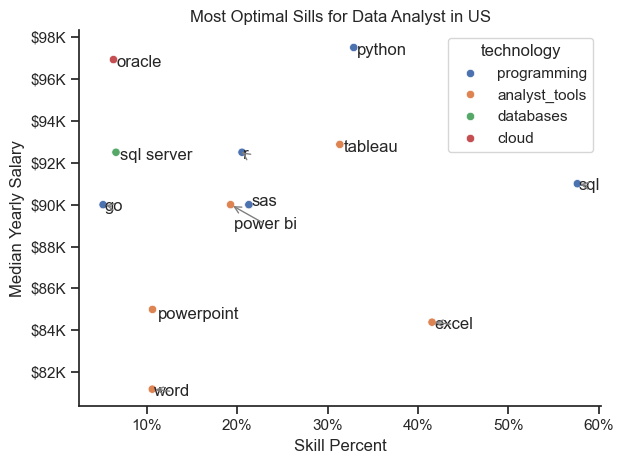

In [174]:
# Plotting
sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)
sns.despine()
sns.set_theme(style='ticks')
texts=[]
from matplotlib.ticker import PercentFormatter
for i, txt in enumerate(df_DA_skills_lim.index):
    texts.append(plt.text(df_DA_skills_lim['skill_percent'].iloc[i], df_DA_skills_lim['median_salary'].iloc[i], txt, va='top'))
# adjust text to overlap
adjust_text(
    texts, 
    arrowprops=dict(arrowstyle='->', color='gray'),
    expand_points=(1.2, 1.5),  # Spacing from points
    expand_text=(1.2, 1.5),    # Spacing between labels
    force_text=(0.05, 0.3),    # Push overlapping labels apart
)
plt.xlabel('Skill Percent')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Sills for Data Analyst in US')
ax=plt.gca()
ax=ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax=plt.gca()
ax=ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.tight_layout()
plt.show()